# Problem Statement

You are given a dataset containing user tweets. These tweets can be negative (0), neutral (2) and positive (4). Based on the obtained data your goal is to identify the sentiment/polarity of the tweets.

About the dataset

There are 6 columns/features in the dataset and are described below:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
ids: The id of the tweet ( ex :2087)
date: the date of the tweet (ex: Sat May 16 23:58:44 UTC 2009)
flag: The query (lyx). If there is no query, then this value is NO_QUERY.
user: the user-name of the user that tweeted
text: the text of the tweet

# What is the problem?

Twitter data is massive and as such analyzing twitter data is a mammoth undertaking. the cleaning and pre-processing of Twitter. Political polarization and reactions to new products are probably some of the biggest use-cases of twitter data analytics.

In [7]:
# import packages
import pandas as pd
import numpy as np
import re
columns = ['target','ids','date','flag','user','text']

In [21]:
# load zip file
data = pd.read_csv('file.csv', encoding = 'latin-1', header = None)

# rename columns

data.columns = columns
# take only sample of data\

data.shape

(1600000, 6)

In [9]:
# shape of data
data = data.sample(n=5000, random_state=2)
data

,target,ids,date,flag,user,text
670081,0,2246455751,Fri Jun 19 17:37:19 PDT 2009,NO_QUERY,louiseisanelf,@brodiejay OH IM GOING THERE! Wow Mona Vale is...
408251,0,2059364084,Sat Jun 06 16:47:03 PDT 2009,NO_QUERY,MrsAmarieB,my baby's growing up
1559739,4,2186151891,Mon Jun 15 18:25:49 PDT 2009,NO_QUERY,epallaviccini,Painted Black-Rolling Stones..the best!
571248,0,2208723981,Wed Jun 17 09:33:02 PDT 2009,NO_QUERY,Kiwitabby,"kk, i'm logging off now BYEZZ!"
524639,0,2193564503,Tue Jun 16 08:37:46 PDT 2009,NO_QUERY,annaqui,Shitty shitty shitty news today
...,...,...,...,...,...,...
861659,4,1676712659,Fri May 01 22:55:52 PDT 2009,NO_QUERY,TRACKSTAR1323,@Iyanaphresh WOW!! IT ONLY TOOK U 5YEARS!! LOL
754430,0,2287986915,Mon Jun 22 18:33:56 PDT 2009,NO_QUERY,CrazyGirlL,@Avenge_MyXGhost Awww that sucks hun
9422,0,1548744061,Fri Apr 17 21:50:31 PDT 2009,NO_QUERY,Volcone,"CANUCKS 2-0 SERIES, THE &quot;BLUES&quot; ARE ..."
744721,0,2267216191,Sun Jun 21 09:48:53 PDT 2009,NO_QUERY,uofachick,sad that i don't get to see the boyfriend for ...


# Tackling user handles
Tweets can be directed to any other person with username/user handle "NAME" @NAME. Consider the tweet '@brodiejay OH IM GOING THERE! Wow Mona Vale is a real place afterall! I know it sucks Mville only does the slow train pffft '. Here, '@brodiejay' is the user handle or username of the person to whom that particular tweet was directed/referred. If you take another tweet "my baby's growing up ", it doesn't contain any such user handle. So, in the dataset, user handles are present, but not in all observations.

From basic intuition it is clear that user handles have little to zero contribution towards sentiment formation. So, it is a good idea to remove them altogether from the data. Getting rid of user handles also helps in reduction of the term-frequency matrix that gets generated. This will directly boost up calculation speed and also performance as unnecessary features will not be generated.

In [12]:
# import packages
import numpy as np
import re

# function to remove user handles
 

# remove user handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt  
data['clean_text'] = data['text'].apply(lambda row:remove_pattern(row, "@[\w]*"))


# first five observations
data.head(5)


,target,ids,date,flag,user,text,clean_text
670081,0,2246455751,Fri Jun 19 17:37:19 PDT 2009,NO_QUERY,louiseisanelf,@brodiejay OH IM GOING THERE! Wow Mona Vale is...,OH IM GOING THERE! Wow Mona Vale is a real pl...
408251,0,2059364084,Sat Jun 06 16:47:03 PDT 2009,NO_QUERY,MrsAmarieB,my baby's growing up,my baby's growing up
1559739,4,2186151891,Mon Jun 15 18:25:49 PDT 2009,NO_QUERY,epallaviccini,Painted Black-Rolling Stones..the best!,Painted Black-Rolling Stones..the best!
571248,0,2208723981,Wed Jun 17 09:33:02 PDT 2009,NO_QUERY,Kiwitabby,"kk, i'm logging off now BYEZZ!","kk, i'm logging off now BYEZZ!"
524639,0,2193564503,Tue Jun 16 08:37:46 PDT 2009,NO_QUERY,annaqui,Shitty shitty shitty news today,Shitty shitty shitty news today


In [13]:
# import packages
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]

# tokenize
data['tokenized_text'] = [nltk.word_tokenize(x) for x in data['clean_text']]

# stopword removal
data['tokenized_text'] = data['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x))
data.head()

,target,ids,date,flag,user,text,clean_text,tokenized_text
670081,0,2246455751,Fri Jun 19 17:37:19 PDT 2009,NO_QUERY,louiseisanelf,@brodiejay OH IM GOING THERE! Wow Mona Vale is...,OH IM GOING THERE! Wow Mona Vale is a real pl...,OH IM go there wow mona vale real place aftera...
408251,0,2059364084,Sat Jun 06 16:47:03 PDT 2009,NO_QUERY,MrsAmarieB,my baby's growing up,my baby's growing up,babi grow
1559739,4,2186151891,Mon Jun 15 18:25:49 PDT 2009,NO_QUERY,epallaviccini,Painted Black-Rolling Stones..the best!,Painted Black-Rolling Stones..the best!,paint black-rol stones..th best
571248,0,2208723981,Wed Jun 17 09:33:02 PDT 2009,NO_QUERY,Kiwitabby,"kk, i'm logging off now BYEZZ!","kk, i'm logging off now BYEZZ!",kk 'm log byezz
524639,0,2193564503,Tue Jun 16 08:37:46 PDT 2009,NO_QUERY,annaqui,Shitty shitty shitty news today,Shitty shitty shitty news today,shitti shitti shitti news today


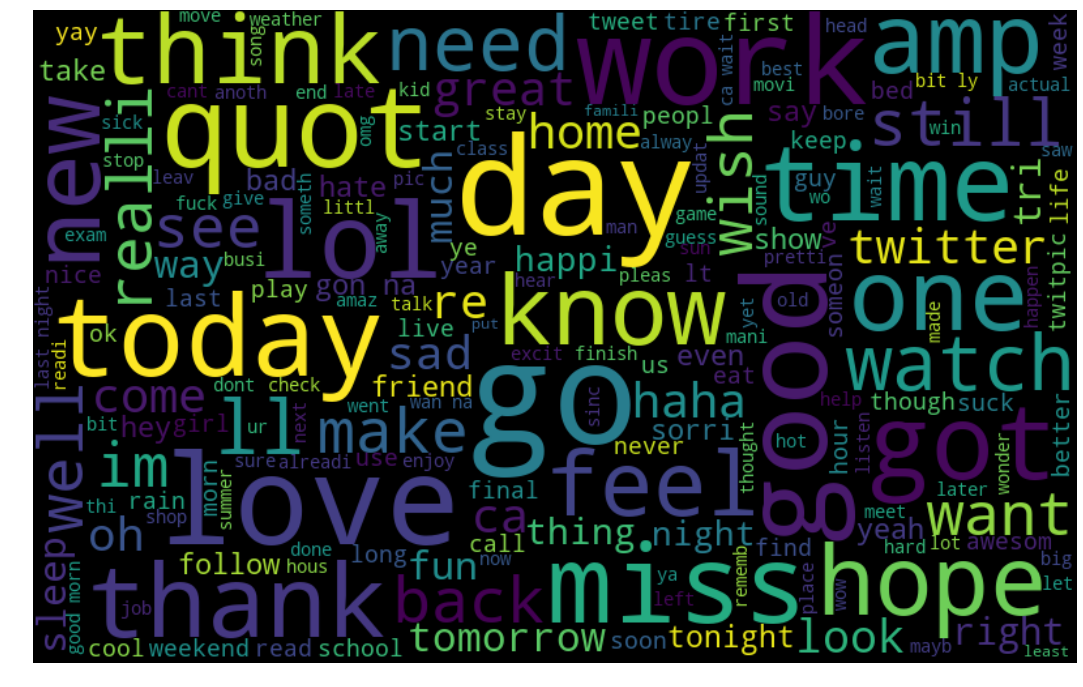

In [18]:
# import packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# all the tweets
all_words = ' '.join([text for text in data['tokenized_text']])

# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot wordcloud
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

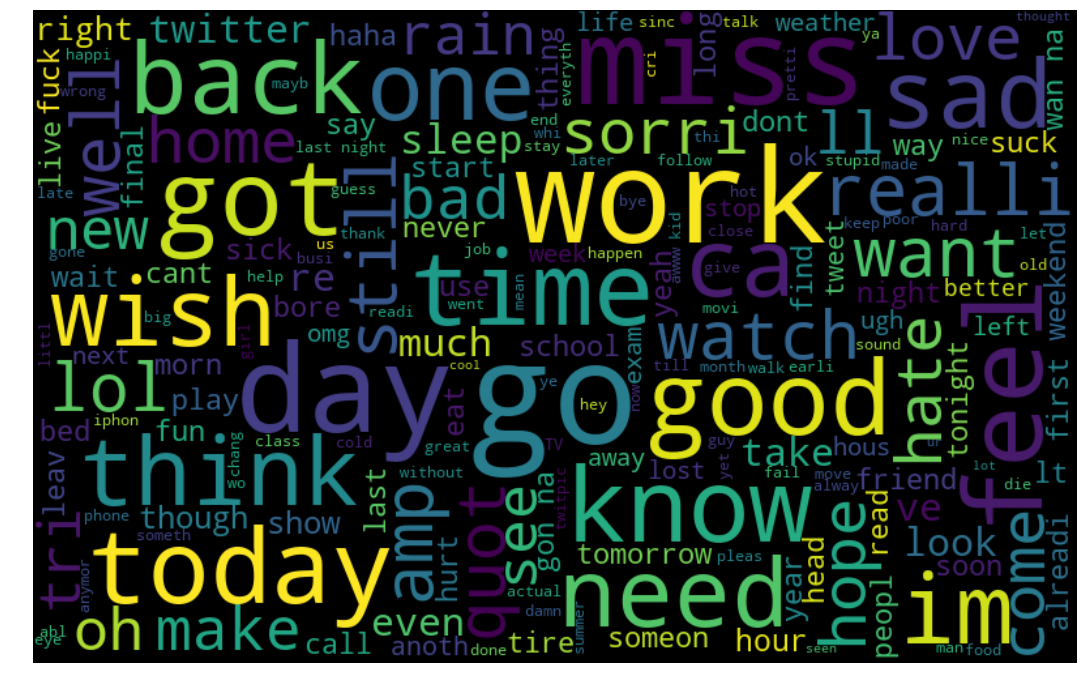

In [19]:
# negative tweets
neg_words = ' '.join([text for text in data['tokenized_text'][data['target'] == 0]])

# generate wordcloud object for negative tweets
neg_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(20, 12))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

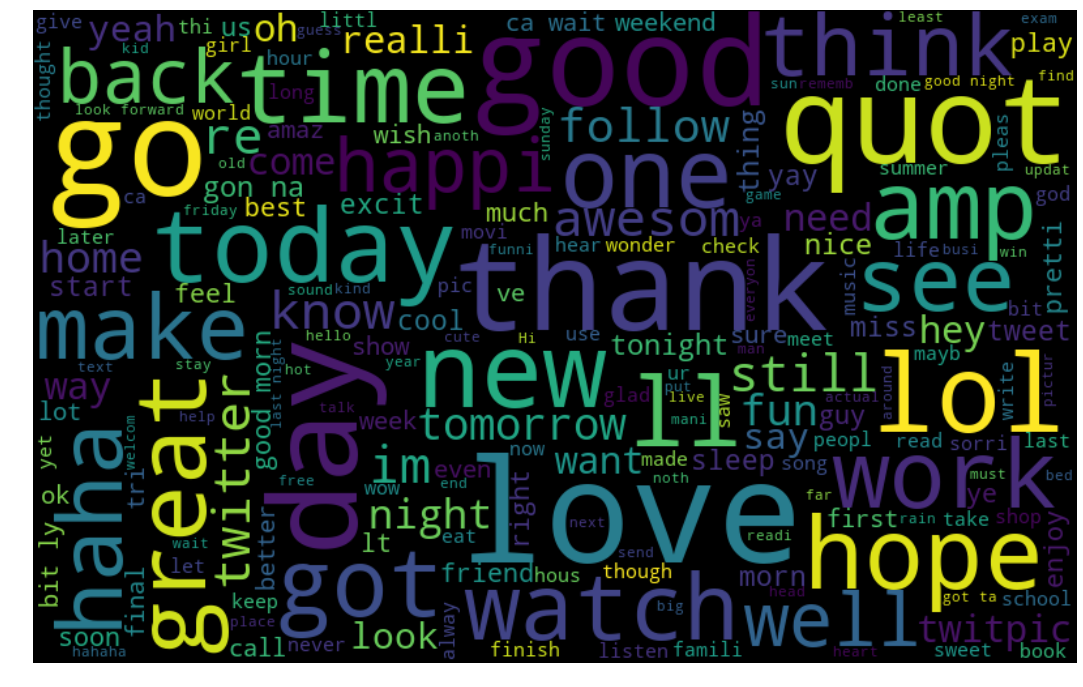

In [23]:
# positive tweets
pos_words = ' '.join([text for text in data['tokenized_text'][data['target'] == 4]])

# generate wordcloud object for negative tweets
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(20, 12))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ratio to split into training and test set
ratio = int(len(data)*0.75)

# logistic regression model
logreg = LogisticRegression(random_state=2)

# Code starts here

# TF-IDF feature matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# fit and transform tweets
tweets = tfidf_vectorizer.fit_transform(data['tokenized_text'])

# convert positive tweets to 1's
data['target'] = data['target'].apply(lambda x: 1 if x==4 else x)

# split into train and test
X_train = tweets[:ratio,:]
X_test = tweets[ratio:,:]
y_train = data['target'].iloc[:ratio]
y_test = data['target'].iloc[ratio:]

# fit on training data
logreg.fit(X_train,y_train)

# make predictions
prediction = logreg.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
report = classification_report(y_test,prediction_int)

# print out accuracy
print(report)

              precision    recall  f1-score   support

           0       0.83      0.34      0.48       596
           1       0.61      0.94      0.74       654

    accuracy                           0.65      1250
   macro avg       0.72      0.64      0.61      1250
weighted avg       0.71      0.65      0.62      1250



In [33]:
# import packages
from textblob import TextBlob

# list to store polarities
tb_polarity = []

# loop over tweets
for sentence in data['tokenized_text']:
    temp = TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0])

# new column to store polarity    
data['tb_polarity'] = tb_polarity
data.head(10)

,target,ids,date,flag,user,text,clean_text,tokenized_text,tb_polarity
670081,0,2246455751,Fri Jun 19 17:37:19 PDT 2009,NO_QUERY,louiseisanelf,@brodiejay OH IM GOING THERE! Wow Mona Vale is...,OH IM GOING THERE! Wow Mona Vale is a real pl...,OH IM go there wow mona vale real place aftera...,0.000000
408251,0,2059364084,Sat Jun 06 16:47:03 PDT 2009,NO_QUERY,MrsAmarieB,my baby's growing up,my baby's growing up,babi grow,0.000000
1559739,1,2186151891,Mon Jun 15 18:25:49 PDT 2009,NO_QUERY,epallaviccini,Painted Black-Rolling Stones..the best!,Painted Black-Rolling Stones..the best!,paint black-rol stones..th best,1.000000
571248,0,2208723981,Wed Jun 17 09:33:02 PDT 2009,NO_QUERY,Kiwitabby,"kk, i'm logging off now BYEZZ!","kk, i'm logging off now BYEZZ!",kk 'm log byezz,0.000000
524639,0,2193564503,Tue Jun 16 08:37:46 PDT 2009,NO_QUERY,annaqui,Shitty shitty shitty news today,Shitty shitty shitty news today,shitti shitti shitti news today,0.000000
311150,0,2001240587,Tue Jun 02 00:15:30 PDT 2009,NO_QUERY,smellyocheese,@Askmewhats * hugs* what's wrong?,* hugs* what's wrong?,hugs* wrong,-0.500000
591282,0,2217604896,Wed Jun 17 21:06:35 PDT 2009,NO_QUERY,jonschubin,@samverrill: You do if you have an iPod touch....,: You do if you have an iPod touch... But who...,you ipod touch but care 3.0 great,0.800000
488533,0,2182645578,Mon Jun 15 13:26:50 PDT 2009,NO_QUERY,mamajuicy,Haha I meant jog not job! Ahh I'm sunburned,Haha I meant jog not job! Ahh I'm sunburned,haha I meant jog job ahh I 'm sunburn,0.200000
145612,0,1882261664,Fri May 22 06:32:46 PDT 2009,NO_QUERY,adw7984,heard an upsetting spoiler about the SYTYCD To...,heard an upsetting spoiler about the SYTYCD To...,heard upset spoiler sytycd top 20 depress,0.216667
1470193,1,2065012236,Sun Jun 07 07:41:46 PDT 2009,NO_QUERY,raindroponarose,Must re-evaluate all black outfit... SO hot ou...,Must re-evaluate all black outfit... SO hot ou...,must re-evalu black outfit SO hot replac light...,0.041667


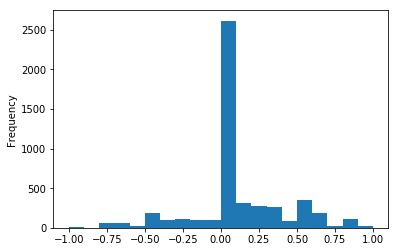

In [32]:
data.tb_polarity.plot(kind='hist',bins=20)

In [35]:
# import packages
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialize analyser object
analyser = SentimentIntensityAnalyzer()

# empty list to store VADER polarities
vs_polarity = []

# loop over tweets
for sentence in data['tokenized_text']:
    vs_polarity.append(analyser.polarity_scores(sentence)['compound'])

# add new column `'vs_polarity'` to data
data['vs_polarity'] = vs_polarity

data.head(10)

,target,ids,date,flag,user,text,clean_text,tokenized_text,tb_polarity,vs_polarity
670081,0,2246455751,Fri Jun 19 17:37:19 PDT 2009,NO_QUERY,louiseisanelf,@brodiejay OH IM GOING THERE! Wow Mona Vale is...,OH IM GOING THERE! Wow Mona Vale is a real pl...,OH IM go there wow mona vale real place aftera...,0.000000,0.2263
408251,0,2059364084,Sat Jun 06 16:47:03 PDT 2009,NO_QUERY,MrsAmarieB,my baby's growing up,my baby's growing up,babi grow,0.000000,0.0000
1559739,1,2186151891,Mon Jun 15 18:25:49 PDT 2009,NO_QUERY,epallaviccini,Painted Black-Rolling Stones..the best!,Painted Black-Rolling Stones..the best!,paint black-rol stones..th best,1.000000,0.6369
571248,0,2208723981,Wed Jun 17 09:33:02 PDT 2009,NO_QUERY,Kiwitabby,"kk, i'm logging off now BYEZZ!","kk, i'm logging off now BYEZZ!",kk 'm log byezz,0.000000,0.3612
524639,0,2193564503,Tue Jun 16 08:37:46 PDT 2009,NO_QUERY,annaqui,Shitty shitty shitty news today,Shitty shitty shitty news today,shitti shitti shitti news today,0.000000,0.0000
311150,0,2001240587,Tue Jun 02 00:15:30 PDT 2009,NO_QUERY,smellyocheese,@Askmewhats * hugs* what's wrong?,* hugs* what's wrong?,hugs* wrong,-0.500000,0.0258
591282,0,2217604896,Wed Jun 17 21:06:35 PDT 2009,NO_QUERY,jonschubin,@samverrill: You do if you have an iPod touch....,: You do if you have an iPod touch... But who...,you ipod touch but care 3.0 great,0.800000,0.8990
488533,0,2182645578,Mon Jun 15 13:26:50 PDT 2009,NO_QUERY,mamajuicy,Haha I meant jog not job! Ahh I'm sunburned,Haha I meant jog not job! Ahh I'm sunburned,haha I meant jog job ahh I 'm sunburn,0.200000,0.4588
145612,0,1882261664,Fri May 22 06:32:46 PDT 2009,NO_QUERY,adw7984,heard an upsetting spoiler about the SYTYCD To...,heard an upsetting spoiler about the SYTYCD To...,heard upset spoiler sytycd top 20 depress,0.216667,-0.6124
1470193,1,2065012236,Sun Jun 07 07:41:46 PDT 2009,NO_QUERY,raindroponarose,Must re-evaluate all black outfit... SO hot ou...,Must re-evaluate all black outfit... SO hot ou...,must re-evalu black outfit SO hot replac light...,0.041667,0.0000
